# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers?

H0: There is not a significant difference in the network latency with different internet providers

H1: There is a significat increase in the network latency with different internet providers

type I error = I reject there is not a significant difference in the network latency with different internet providers but in reality there is not a significant

type II error = I fail to reject the null hypothesis (There is not a significant difference in the network latency with different internet providers) when it is actually false that means There is a significat increase in the network latency with different internet providers.

# Is the website redesign any good?

H0: the website redesign does not increase revenue

H1: :the website redesign increases revenue

type I error : I reject the null hypothesis( the website redesign does not increase revenue) but it is acually true

type II error: I fail to reject the null hypothesis (the website redesign does not increase revenue) but acually the website redesign increases revenue

# Is our television ad driving more sales?

H0: the television add does not change sales

H1: the television ad increases sales

type I error : I reject the null hypothesis (television ad increase sales), but, in reality television add does not change sales

type II error : I fail to reject the null hypothesis (television ad increase sales) when it is actually false.

# T-test exercises

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pydataset import data

# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- H0: Mean days to sell for office 1 same as mean days to sell for office 2
- Ha: Mean days to sell for office 1 is difference in mean days to sell for office 2

In [13]:
#Two Samples

store_1 = 40
mean1 = 90
std1 = 15

store_2 = 50
mean2 = 100
std2 = 20

#Level of significance
α = 0.05

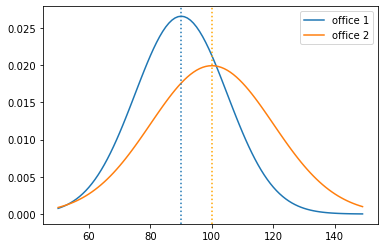

In [14]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(mean1,std1).pdf(x)
y2 = stats.norm(mean2, std2).pdf(x)

plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(mean1, ls = ':')
plt.axvline(mean2, ls = ':', color = 'orange')

plt.legend()

In [8]:
t, p = stats.ttest_ind_from_stats(mean1, std1, store_1, mean2, std2, store_2, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [9]:
if p < α:
    print ("We reject the null hypothesis")
else:
    print ("We failed to reject the null hypothesis")

We reject the null hypothesis


# Load the mpg dataset and use it to answer the following questions:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- H0: There is not a difference in fuel-efficiency in cars from 2008 to 1999
- Ha: There is a significant difference in fuel-efficiency in cars from 2008 to 1999

In [3]:
# mpg = sns.load_dataset('mpg') this dataset is difference from pydataset
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg["average_mileage"] = (mpg.hwy + mpg.cty) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [30]:
cars_2008 = mpg.average_mileage[mpg.year == 2008]
cars_1999 = mpg.average_mileage[mpg.year == 1999]

In [47]:
cars_1999.var(),cars_2008.var() # Variances comparason between 1999 and 2008 model

(27.122605363984682, 24.097480106100797)

In [46]:
cars_1999.mean(),cars_2008.mean()

(20.22222222222222, 20.076923076923077)

In [32]:
α = 0.05

In [45]:
t, p = stats.ttest_ind(cars_1999, cars_2008, equal_var=False)
t, p, α

(0.21960177245940962, 0.8263750772060638, 0.05)

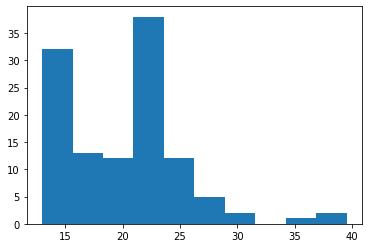

In [35]:
cars_1999.hist()
plt.grid(False)

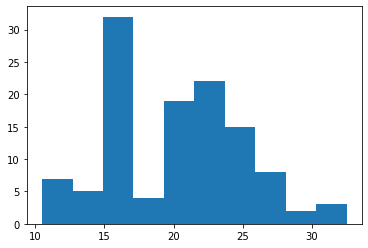

In [36]:
cars_2008.hist()
plt.grid(False)

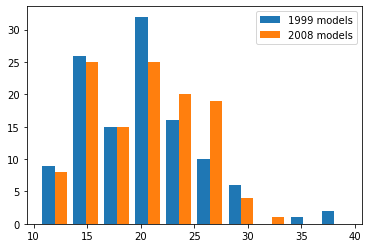

In [55]:
plt.hist([cars_1999, cars_2008], label = ["1999 models", "2008 models"])
plt.legend(loc='upper right')

In [56]:
if p < α:
    print ("We reject the null hypothesis")
else:
    print("We failed to reject the null hypothesis")

We failed to reject the null hypothesis


# Are compact cars more fuel-efficient than the average car?

- H0: There is not a difference in fuel-efficiency between compact cars and the average car
- Ha: Compact cars are more fuel-efficient than the average

In [57]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [6]:
compact = mpg.average_mileage[mpg["class"] == "compact"]

In [63]:
compact.shape

(47,)

In [8]:
average_car = mpg['average_mileage'].mean()

In [10]:
α =.05

In [12]:
t, p = stats.ttest_1samp(compact,average_car)
t, p/2, α

(7.896888573132535, 2.0992818971585668e-10, 0.05)

In [72]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Do manual cars get better gas mileage than automatic cars?

- H0 = There is no difference in average gas mileage between manual and automatic trabsmission cars 
- Ha = the fuel-efficiency in manual cars are better than automatic transmission cars

In [75]:
manual_cars = mpg['average_mileage'][mpg.trans.str.contains('manual')]
auto_cars = mpg['average_mileage'][mpg.trans.str.contains('auto')]

In [81]:
α = 0.05

In [77]:
auto_cars.var(), manual_cars.var()

(21.942777233382337, 26.635167464114826)

In [83]:
t, p = stats.ttest_ind(manual_cars, auto_cars)
t, p/2, α

(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [84]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
